# Final Project : ***Writing Using Air Gestures***

## Introduction

This project is a combination of object detection and image classification based on the IOS edge device. Through the device’s camera, detecting the user’s fingertip and tracking the movement of the fingertip with a black line. And then using image classification to recognize the digits that users have written.

> Instructions: one finger for drawing, two fingers for pasue drawing, three fingers for clearing the screen.



![alt text](https://docs.google.com/uc?export=download&id=1tG3LsgnMbuZcsekFZQT9Ya6_RaFptNnz)

### Part I: Object detection

> Based on the tutorial of [Edge TF lite iOS tutorial](https://cloud.google.com/vision/automl/object-detection/docs/tflite-ios-tutorial) and use the model trained in Google AutoML.



418 pictures with the label "***finger_tip***"

![alt text](https://docs.google.com/uc?export=download&id=1WaasSqpVUPZOArNEsC72D4w-0hOc_kkR)

**Trade-off between computation time and accuracy**

I use the best trade-off model. Because the dataset is not large and I need a good accuracy and response speed to make the writing smooth. I think the accuracy of the model can be improved by increasing the size of the dataset and then we can choose the model with the fastest computation to make us have the best writing experience. 

### Part II: Image classification

> Based on MNIST dataset and CNN network.



**Import libraries**

In [0]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

Using TensorFlow backend.


**Load dataset**

In [0]:
(trainX, trainY), (testX, testY) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


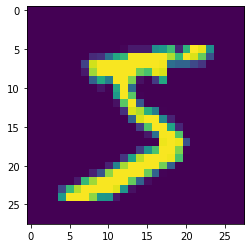

In [0]:
pyplot.imshow(trainX[0])

1.   Load dataset
2.   Reshape dataset to a single channel
3.   Apply one hot encode to labels


In [0]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

**Preprocessing dataset**

> Convert the value of pixels from integers to floats and then normalize to range 0 - 1



In [0]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

**Define CNN model**

In [0]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [0]:
# run the test harness for evaluating a model
def run():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
	# save model
	model.save('final_model.h5')

**Run the model**

In [0]:
run()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










**Evaluate the model**

In [0]:
from keras.models import load_model
trainX, trainY, testX, testY = load_dataset()
model = load_model('final_model.h5')
# evaluate model on test dataset
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 99.190


**Make a prediction**

In [0]:
!wget -O test.png https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/sample_image-300x298.png

--2020-02-01 02:39:49--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/sample_image-300x298.png
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 108.161.188.228
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)|108.161.188.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2345 (2.3K) [image/png]
Saving to: ‘test.png’

test.png            100%[===================>]   2.29K  --.-KB/s    in 0s      

2020-02-01 02:39:49 (365 MB/s) - ‘test.png’ saved [2345/2345]



In [0]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
	pyplot.imshow(img)
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

7


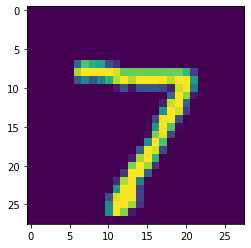

In [0]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img = load_image('test.png')
digit = model.predict_classes(img)
print(digit[0])

## Challenges during project

### 1. The problem of fingertip detection

**No prediction**

![alt text](
https://docs.google.com/uc?export=download&id=1MQty9m9lN0bXyTpqHGgNkdry3cb_PGub)

**Wrong prediction**


![alt text](https://docs.google.com/uc?export=download&id=1qca2yy4-Mun6bTo32HTn3deWix0uspgn)


***Solution***

> Increasing the number of pictures for training from 93 to 418



### 2. The problem of handwritten digits

The hug gap between two resolutions makes the picture easy to lose information in the preprocessing of reshape. 

![alt text](https://docs.google.com/uc?export=download&id=1w3ld5fHFEvwA7Y6-vKws1SJFtpvl5IAP)

**After reshaping**

![alt text](https://docs.google.com/uc?export=download&id=1XaiWpLdLq6kXshvaGmZbKihfscB7Ga-2)



**Solution**

> Resize the picture to 112 by 112, reshpe it to 28 x 28 and then put it into the model to make predictions. 


![alt text](https://docs.google.com/uc?export=download&id=11M7RhRJ-97jR5NkdTVdp6B9HNLZvV_Ke)

***Possible solution***

> Using the [model](http://blog.otoro.net/2016/04/01/generating-large-images-from-latent-vectors/) with Compositional Pattern Producing Networks (CPPN) combined with Variation Autoencoder (VAE) and Generative Adversarial Networks (GAN) to generate images with high resolutuion.



![alt text](https://docs.google.com/uc?export=download&id=14W5qvec25NQFrPeMKkUa6eInhE79y3f1)

## Future

### Applications



### 1.   VR Games




![alt text](https://docs.google.com/uc?export=download&id=1cKO7DkDGIC5RbXI76AJ7iNJKXIqU5yA0)


### 2.   Smart Devices



![alt text](https://docs.google.com/uc?export=download&id=1xTlFvgi5_f1RdjHM9t7szYt1UdhIgzgp)





### 3.   Holographic Projection

![alt text](https://docs.google.com/uc?export=download&id=10j9TQzZ32Om6fXoj7NfwITJVIyxva8Qz)

## Report


> https://drive.google.com/open?id=1jyEodGnFKugR1xqLvoQct8RwHDqmLDMX



## Demo

> https://drive.google.com/open?id=1USy7P8v0_BMWt6moBg2X78Au7JBwgGZI



## Github

> https://github.com/candicejerry/Writing-using-Air-Gestures



## References
> CPPN: http://blog.otoro.net/2016/04/01/generating-large-images-from-latent-vectors/

> Google edge TF Lite IOS tutorial: https://cloud.google.com/vision/automl/object-detection/docs/tflite-ios-tutorial



